In [11]:
import numpy as np
import matplotlib.pyplot as plt

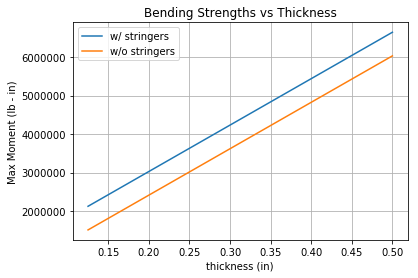

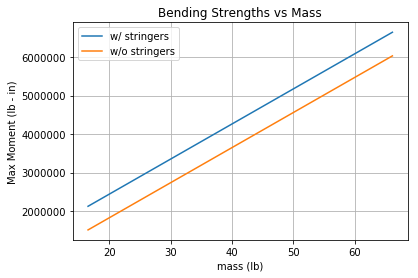

In [49]:
SFy = 1.25
SFu = 1.5  # factor of safety, ultimate

# material properties
rho = 0.0975  # lb/in^3
sigmay = 19000  # psi
sigmau = 33000  # psi

sigmastar = min(sigmay/SFy, sigmau/SFu)

# airframe calculations
length = 36  # length of monocoque section
radius_mean = 6  # in

thickness = np.linspace(0.125, 0.5)  # in

circumference = 2*np.pi*radius_mean
mass = circumference * thickness * length * rho  # mass of cylinder

## without stringers
# moment of inertia of the cylinder
inertia = mass * radius_mean**2
# calculating stresses
momentMax = sigmastar * inertia / radius_mean

## with stringers
num_stringers = 8

# stringer properties (parallel axis theorem only)
radius_stringer = radius_mean  # okay assumption for now
mass_stringer = (0.6 * 0.2 * length * 2) * rho # assuming t-section stringers
inertia_stringer = mass_stringer * radius_stringer**2 * num_stringers

total_mass_stringers = mass_stringer * num_stringers + mass

inertia = inertia + inertia_stringer
momentMax_stringers = sigmastar * inertia / radius_mean

# calculating stresses
plt.figure(1)
plt.grid(True)
plt.plot(thickness, momentMax_stringers)
plt.plot(thickness, momentMax)
plt.title('Bending Strengths vs Thickness')
plt.xlabel('thickness (in)')
plt.ylabel('Max Moment (lb - in)')
plt.legend(['w/ stringers', 'w/o stringers'])
plt.show()

plt.figure(2)
plt.grid(True)
plt.plot(mass, momentMax_stringers)
plt.plot(mass, momentMax)
plt.title('Bending Strengths vs Mass')
plt.xlabel('mass (lb)')
plt.ylabel('Max Moment (lb - in)')
plt.legend(['w/ stringers', 'w/o stringers'])
plt.show()
